# August 2, 2021 (Monday) Data Analysis Notebook

In [29]:
# current date, for retrieving data from proper location.
year = "2021"
month = "July"
day = "28"

## Imports and initialization

In [30]:
from matplotlib import gridspec

In [31]:
import scipy.signal

In [32]:
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)

In [33]:
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [34]:
dark_viridis_cmap

In [35]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao

import imp
def reloadAll(day_=None, diplsayErrors=False):
    for module in sys.modules.values():
        try:
            reload(module)
        except NotImplementedError:
            if diplsayErrors:
                print(module, 'NotImplementedError')
        except AttributeError:
            if diplsayErrors:
                print(module, 'AttributeError')
        except TypeError:
            if diplsayErrors:
                print(module, 'ValueError')
        except ImportError:
            if diplsayErrors:
                print(module, 'ImportError')
    if day_ is None:
        day_ = day
    setPath(day_,month,year)

In [36]:
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_,sl="/")
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

## Standard Calibrations

### Temperature

#### Running Temperature

In [ ]:
reload(ca)
cTemps, cTimes = ca.loadAllTemperatureData()
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
fig, ax = plt.subplots(figsize=(20,10))
for temp,lab in zip(misc.transpose(cTemps), legends):
    ax.plot(cTimes,temp, label=lab, alpha=0.5, linewidth=1)
ax.legend()
ax.set_title('Lab Temperature Record');
ax.set_ylim(20,30)

In [ ]:
fig, ax = plt.subplots()
for temp,lab in zip(misc.transpose(cTemps), legends):
    ax.plot(cTimes[-50000:],temp[-50000:], label=lab, alpha=0.5, linewidth=1)


#### Today's Temperature

In [ ]:
reloadMyModules()
ah.Temperature();

## individual calibrations

In [ ]:
sCalData = ca.std_analyzeAll()

In [ ]:
with open(exp.dataAddress + 'CalibrationData.p','wb') as calFile:
    pickle.dump(sCalData, calFile)

## Calibration Summmary

In [ ]:
# load all past calibration data into a bigger strucutre.
reloadMyModules()
calData = ca.loadAllCalData()
reloadMyModules(day_=day)

In [ ]:
reload(ca)
ca.checkData(calData)

# Today's Work

In [37]:
reloadMyModules(28)

### Optimizing Imaging

#### Scan of the image_detuning

In [38]:
atomlocs = [2, 2, 3, 7, 1]

In [39]:
res = mp.Survival(3,atomlocs,fitModules=dip,usePickle=False,pickleResult = False,showFitDetails=True);

usebase True
sta: Organizing Transfer Data...
hdf5 /Volumes/Local_Data_Repository/2021/July/July 28/Raw Data/data_3.h5
failed to open
OSError! Exception: Failed to open file! file address was "/Volumes/Local_Data_Repository/2021/July/July 28/Raw Data/data_3.h5". OSError: file does not exist


In [23]:
res.keys()

dict_keys(['Key', 'All_Transfer', 'All_Transfer_Errs', 'Initial_Populations', 'Transfer_Fits', 'Average_Transfer_Fit', 'Average_Atom_Generation', 'Average_Atom_Generation_Err', 'Picture_1_Data', 'Fit_Character', 'Average_Transfer_Pic', 'Transfer_Averaged_Over_Variations', 'Transfer_Averaged_Over_Variations_Err', 'Average_Transfer', 'Average_Transfer_Err', 'Initial_Atom_Images', 'Transfer_Atom_Images', 'Picture_2_Data', 'Initial_Thresholds', 'Transfer_Thresholds', 'Fit_Modules', 'Average_Fit_Character', 'Ensemble_Hits', 'InitAtoms', 'TferAtoms', 'tferList', 'Main_Axis', 'Figures'])

In [25]:
print(res["Fit_Character"])

[-1.2174422799186095, -1.2561356549832925, -1.1986816728852725, -1.2400305506011444, -1.253735678956542, -1.3378998729040432, -1.419093598469284]


In [26]:
prev_biases = [0.15438086125923162, 0.16304936802477857, 0.12201356232137629, 0.15390372855021173, 0.09243256966580327, 0.168725046042693, 0.14549486413590532]

In [33]:
depths = np.array([res["Fit_Character"]])+2

In [49]:
reloadMyModules(28)

In [50]:
ah.getBetterBiases(depths,[1],prev_biases,sign=-1)

Assuming that ( 1 , 1 ) is the bias of the (highest, lowest)-frequency row
Assuming that ( 0.15438086125923162 , 0.14549486413590532 ) is the bias of the (lowest, highest)-frequency column
Please note that if using the outputted centers from Survival(), then you need to reshape the data into a 2D numpy array correctly to match the ordering of the V and H biases. This is normally done via a call to np.reshape() and a transpose to match the comments above.
Sign Argument should be -1 if numbers are pushout resonance locations.
Horizontal Changes
0.1544 -> 0.1409 -8.8%
0.163 -> 0.1565 -4.0%
0.122 -> 0.1087 -11.0%
0.1539 -> 0.1446 -6.0%
0.09243 -> 0.08845 -4.3%
0.1687 -> 0.182 7.8%
0.1455 -> 0.1789 23.0%
Vertical Changes
1 -> 1.0 0.0%
Previous Depth Relative Variation: 0.0716 / 0.7253 = 9.87 %
Expected new Depth Relative Variation: 0.0009146 %
New Vertical Biases 
[1.0 , ]
New Horizontal Biases 
  [ 0.1408719337740144 0.1565230793134625 0.1087284162817169 0.14460987375170356 0.0884468773109

### File 5 (Depth_Measurement_Deep): push out freq for trap evening

hdf5 /Volumes/Local_Data_Repository/2021/July/July 28/Raw Data/data_5.h5
open successfully <HDF5 file "data_5.h5" (mode r)>
Number of Pictures: 2400; Picture Dimensions: 5 x 23
Variations: 12;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:19:14: on (Y-M-D) 2021-7-28, And ended at 15:29:37: on 2021-7-28
Experiment Notes: 1st iteration - overcompensated

Avg Fit R-Squared: 0.955


A: -0.449(34)<br>  $x_0$: -1.243(19)<br>  $\sigma$: 0.241(26)<br>  offset: 0.685(23)<br>  $x_0$: -1.243(19)

,A,A-Err,$x_0$,$x_0$-Err,$\sigma$,$\sigma$-Err,offset,offset-Err
fit 0,-0.657949,0.039329,-1.309545,0.012683,0.198838,0.015584,0.832086,0.021219
fit 1,-0.613524,0.065608,-1.262956,0.024296,0.217096,0.031164,0.770997,0.039102
fit 2,-0.416025,0.082710,-1.348009,0.037535,0.173406,0.043996,0.504197,0.038903
fit 3,-0.394469,0.091499,-1.296448,0.056710,0.242775,0.078006,0.627256,0.062449
fit 4,-0.316329,0.059548,-1.338292,0.038258,0.188804,0.046065,0.476712,0.030431
fit 5,-0.524341,0.038689,-1.179212,0.017713,0.235342,0.023942,0.744514,0.025516
fit 6,-0.569708,0.052240,-1.043286,0.022402,0.242267,0.030406,0.835932,0.035109
Mean Val,-0.498906,0.061375,-1.253964,0.029942,0.214075,0.038452,0.684528,0.036104
Median Val,-0.511624,0.060461,-1.279702,0.027119,0.215586,0.034808,0.714521,0.035607
Std Val,0.102927,0.016562,0.089127,0.012412,0.022624,0.016721,0.122727,0.010944


[-1.3095454795114503, -1.2629564054054405, -1.348009011579089, -1.2964484507909884, -1.3382918571948397, -1.1792115519193433, -1.043286458109067]
Assuming that ( 5 , 5 ) is the bias of the (highest, lowest)-frequency row
Assuming that ( 0.1408719337740144 , 0.1788501573185106 ) is the bias of the (lowest, highest)-frequency column
Please note that if using the outputted centers from Survival(), then you need to reshape the data into a 2D numpy array correctly to match the ordering of the V and H biases. This is normally done via a call to np.reshape() and a transpose to match the comments above.
Sign Argument should be -1 if numbers are pushout resonance locations.
Horizontal Changes
0.1409 -> 0.1465 4.0%
0.1565 -> 0.1584 1.2%
0.1087 -> 0.1157 6.4%
0.1446 -> 0.1493 3.2%
0.08845 -> 0.09359 5.8%
0.182 -> 0.1757 -3.4%
0.1789 -> 0.1607 -10.0%
Vertical Changes
5 -> 1.0 -80.0%
Previous Depth Relative Variation: 0.1006 / 1.746 = 5.76 %
Expected new Depth Relative Variation: 0.001098 %
New Ver

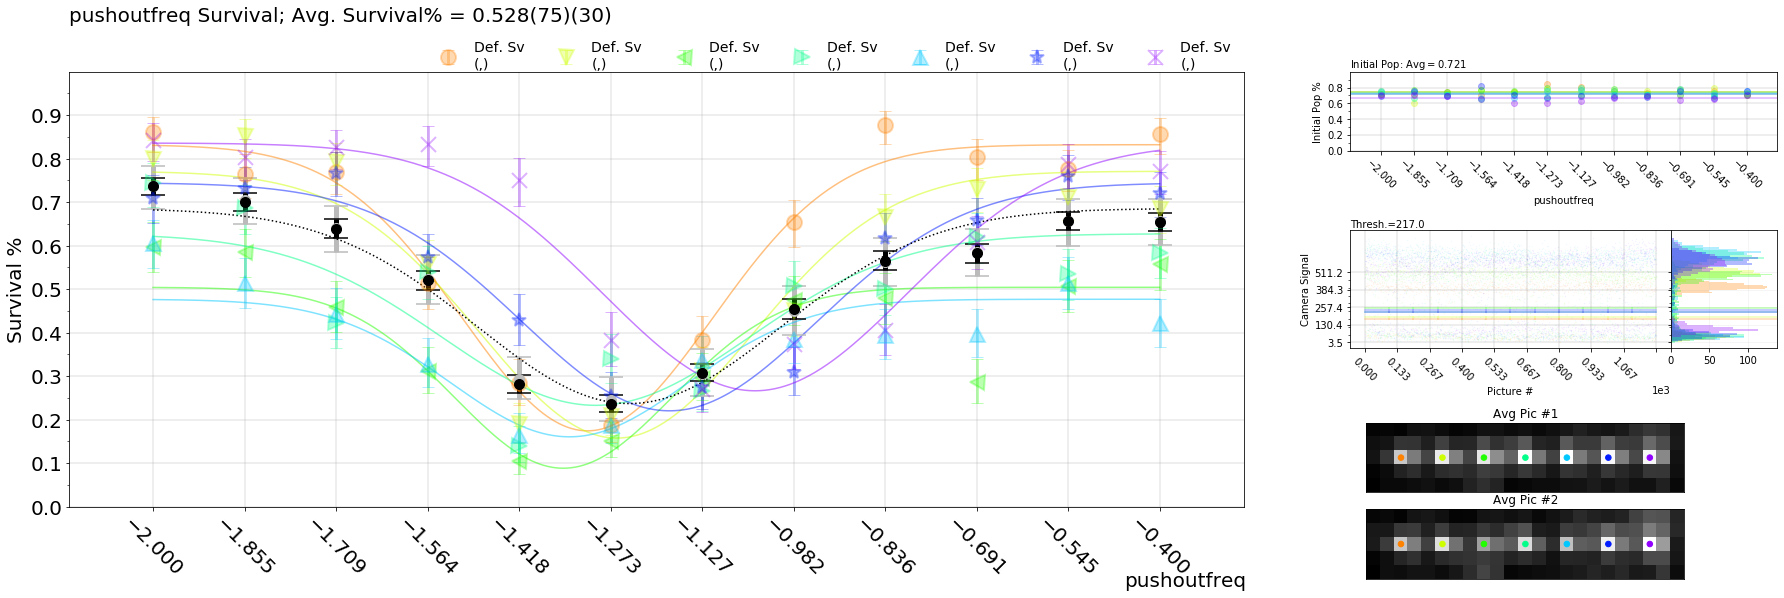

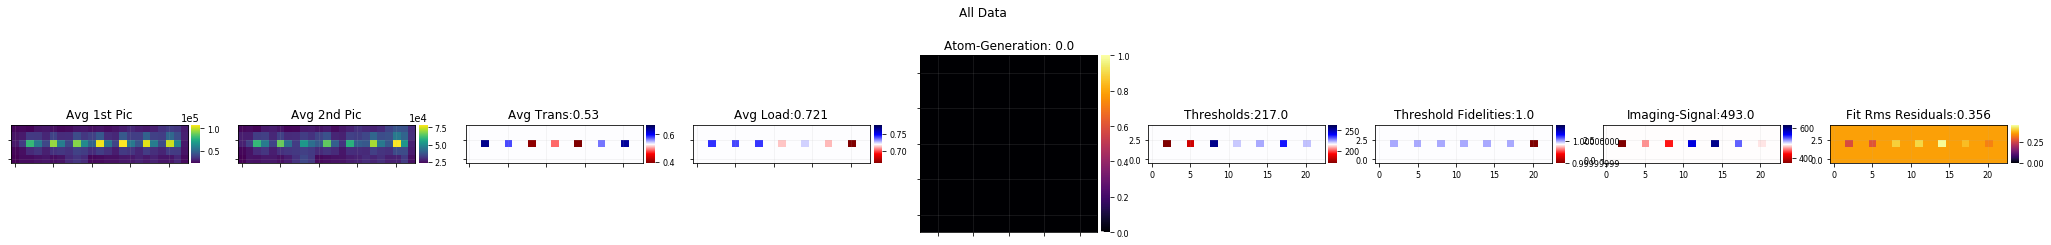

In [52]:
res = mp.Survival(5,atomlocs,fitModules=dip,usePickle=False,pickleResult = False,showFitDetails=True);
print(res["Fit_Character"])
prev_biases = [ 0.1408719337740144, 0.1565230793134625, 0.1087284162817169, 0.14460987375170356, 0.08844687731093835, 0.1819696622496537, 0.1788501573185106 ]
depths = np.array([res["Fit_Character"]])+3
ah.getBetterBiases(depths,[5],prev_biases,sign=-1)

### File 6 (Depth_Measurement_Deep): push out freq - 2nd iteration

hdf5 /Volumes/Local_Data_Repository/2021/July/July 28/Raw Data/data_6.h5
open successfully <HDF5 file "data_6.h5" (mode r)>
Number of Pictures: 2400; Picture Dimensions: 5 x 23
Variations: 12;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:35:55: on (Y-M-D) 2021-7-28, And ended at 15:46:19: on 2021-7-28
Experiment Notes: much better - offset value of 3 was better than 2

Avg Fit R-Squared: 0.959


A: -0.535(39)<br>  $x_0$: -1.245(17)<br>  $\sigma$: 0.230(23)<br>  offset: 0.724(25)<br>  $x_0$: -1.245(17)

,A,A-Err,$x_0$,$x_0$-Err,$\sigma$,$\sigma$-Err,offset,offset-Err
fit 0,-0.615204,0.076549,-1.239378,0.026250,0.197437,0.032176,0.833277,0.041015
fit 1,-0.649504,0.032278,-1.272182,0.011142,0.213245,0.014152,0.815575,0.018836
fit 2,-0.559755,0.059364,-1.292268,0.024203,0.218422,0.031122,0.699092,0.035602
fit 3,-0.526691,0.044637,-1.251204,0.020443,0.237217,0.027761,0.704838,0.029707
fit 4,-0.571453,0.264404,-1.158130,0.049305,0.466676,0.222540,0.855077,0.286056
fit 5,-0.443497,0.059988,-1.206602,0.033155,0.244025,0.046099,0.593555,0.041510
fit 6,-0.563065,0.057305,-1.203666,0.025273,0.250401,0.035925,0.778063,0.041067
Mean Val,-0.561310,0.084932,-1.231918,0.027110,0.261060,0.058539,0.754211,0.070542
Median Val,-0.562188,0.059676,-1.235648,0.025762,0.240621,0.034051,0.766137,0.041041
Std Val,0.053614,0.066066,0.037397,0.009677,0.075846,0.060055,0.076138,0.078433


[-1.2393775096165083, -1.272181525301518, -1.2922684937084805, -1.2512036764204284, -1.1581299621533683, -1.2066020657963337, -1.2036659253806588]
Assuming that ( 6 , 6 ) is the bias of the (highest, lowest)-frequency row
Assuming that ( 0.1408719337740144 , 0.1788501573185106 ) is the bias of the (lowest, highest)-frequency column
Please note that if using the outputted centers from Survival(), then you need to reshape the data into a 2D numpy array correctly to match the ordering of the V and H biases. This is normally done via a call to np.reshape() and a transpose to match the comments above.
Sign Argument should be -1 if numbers are pushout resonance locations.
Horizontal Changes
0.1409 -> 0.1414 0.35%
0.1565 -> 0.1601 2.3%
0.1087 -> 0.1125 3.5%
0.1446 -> 0.1461 1.0%
0.08845 -> 0.08484 -4.1%
0.182 -> 0.1793 -1.5%
0.1789 -> 0.1759 -1.6%
Vertical Changes
6 -> 1.0 -83.0%
Previous Depth Relative Variation: 0.04238 / 1.768 = 2.4 %
Expected new Depth Relative Variation: 0.001274 %
New V

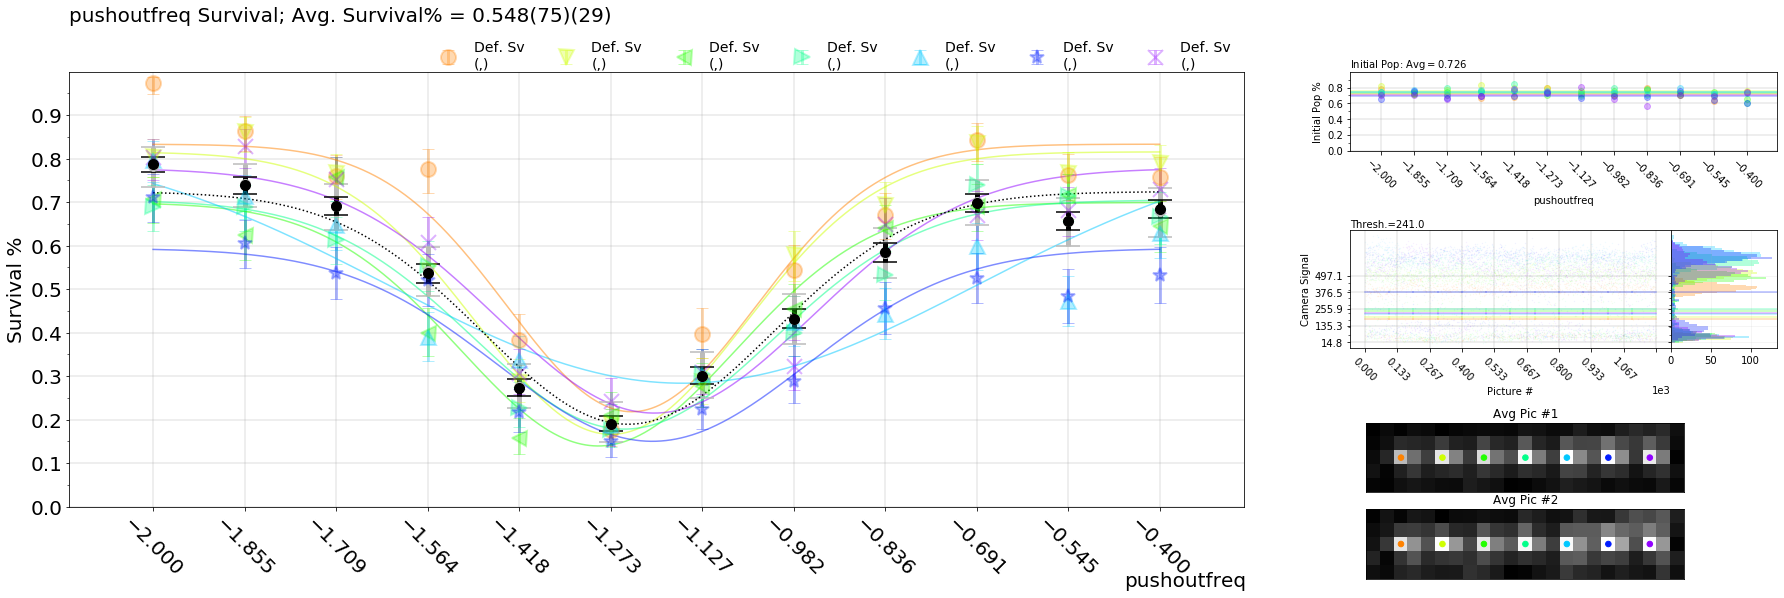

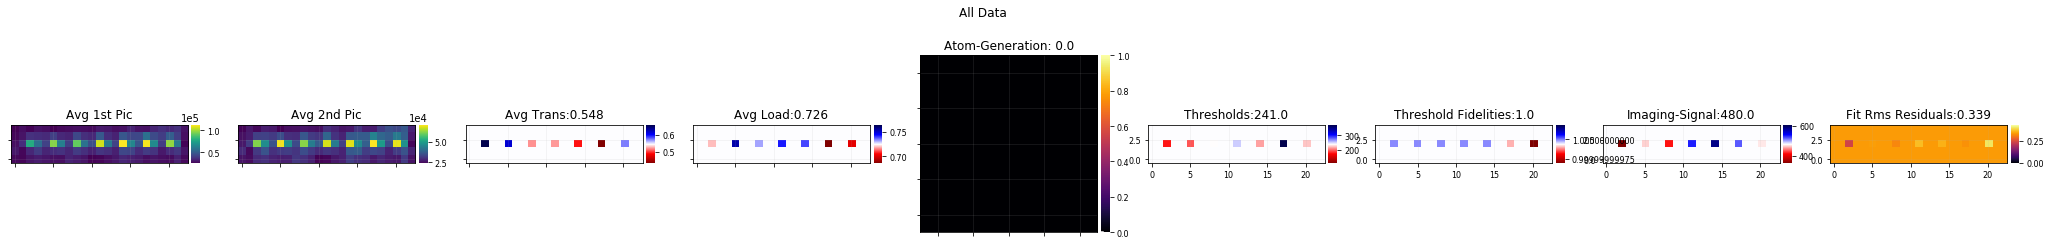

In [55]:
res = mp.Survival(6,atomlocs,fitModules=dip,usePickle=False,pickleResult = False,showFitDetails=True);
print(res["Fit_Character"])
prev_biases = [0.1408719337740144, 0.1565230793134625, 0.1087284162817169, 
               0.14460987375170356, 0.08844687731093835, 0.1819696622496537, 0.1788501573185106 ]
depths = np.array([res["Fit_Character"]])+3
ah.getBetterBiases(depths,[6],prev_biases,sign=-1)

### File 8 (Depth_Measurement_Deep): push out freq - 3rd iteration

hdf5 /Volumes/Local_Data_Repository/2021/July/July 28/Raw Data/data_8.h5
open successfully <HDF5 file "data_8.h5" (mode r)>
Number of Pictures: 4800; Picture Dimensions: 5 x 23
Variations: 12;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 15:56:1: on (Y-M-D) 2021-7-28, And ended at 16:16:14: on 2021-7-28
Experiment Notes: one tweezer looks suspiciously off

Avg Fit R-Squared: 0.970


A: -0.508(32)<br>  $x_0$: -1.232(15)<br>  $\sigma$: 0.238(21)<br>  offset: 0.722(21)<br>  $x_0$: -1.232(15)

,A,A-Err,$x_0$,$x_0$-Err,$\sigma$,$\sigma$-Err,offset,offset-Err
fit 0,-0.633877,0.051708,-1.264300,0.017656,0.203786,0.021939,0.839353,0.028672
fit 1,-0.588069,0.037283,-1.210900,0.014613,0.221428,0.018973,0.768104,0.022774
fit 2,-0.531036,0.035494,-1.283829,0.015873,0.231379,0.021140,0.679680,0.022834
fit 3,-0.537209,0.039523,-1.264043,0.016985,0.221949,0.022063,0.666736,0.024187
fit 4,-0.417147,0.047632,-1.323183,0.027194,0.232407,0.036183,0.545811,0.030682
fit 5,-0.492062,0.042327,-1.210592,0.019304,0.213509,0.024553,0.700579,0.024756
fit 6,-0.567444,0.058098,-1.064736,0.026600,0.292298,0.042485,0.884650,0.049088
Mean Val,-0.538121,0.044581,-1.231655,0.019747,0.230965,0.026762,0.726416,0.028999
Median Val,-0.537665,0.043454,-1.247849,0.018480,0.226457,0.023308,0.713498,0.026714
Std Val,0.057088,0.006753,0.068462,0.004182,0.023565,0.007372,0.093518,0.007667


[-1.264299983776554, -1.2108997271164628, -1.2838293749003828, -1.2640430942773777, -1.3231831017822768, -1.210592434386202, -1.064735835002458]
Assuming that ( 8 , 8 ) is the bias of the (highest, lowest)-frequency row
Assuming that ( 0.1413597441794259 , 0.1759021730485008 ) is the bias of the (lowest, highest)-frequency column
Please note that if using the outputted centers from Survival(), then you need to reshape the data into a 2D numpy array correctly to match the ordering of the V and H biases. This is normally done via a call to np.reshape() and a transpose to match the comments above.
Sign Argument should be -1 if numbers are pushout resonance locations.
Horizontal Changes
0.1414 -> 0.1448 2.5%
0.1601 -> 0.1591 -0.59%
0.1125 -> 0.1166 3.6%
0.1461 -> 0.1497 2.5%
0.08484 -> 0.08999 6.1%
0.1793 -> 0.1782 -0.61%
0.1759 -> 0.1617 -8.1%
Vertical Changes
8 -> 1.0 -88.0%
Previous Depth Relative Variation: 0.07741 / 1.768 = 4.38 %
Expected new Depth Relative Variation: 0.001107 %
New 

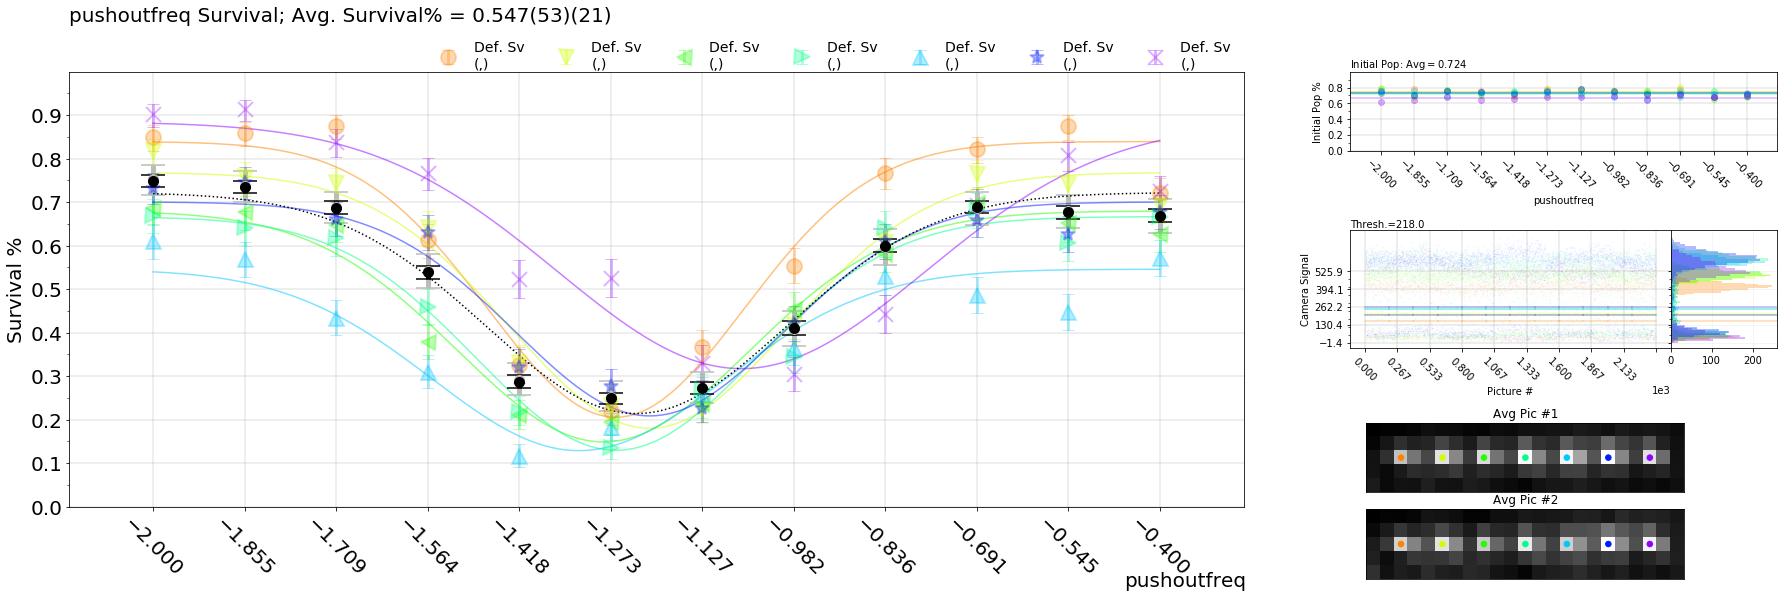

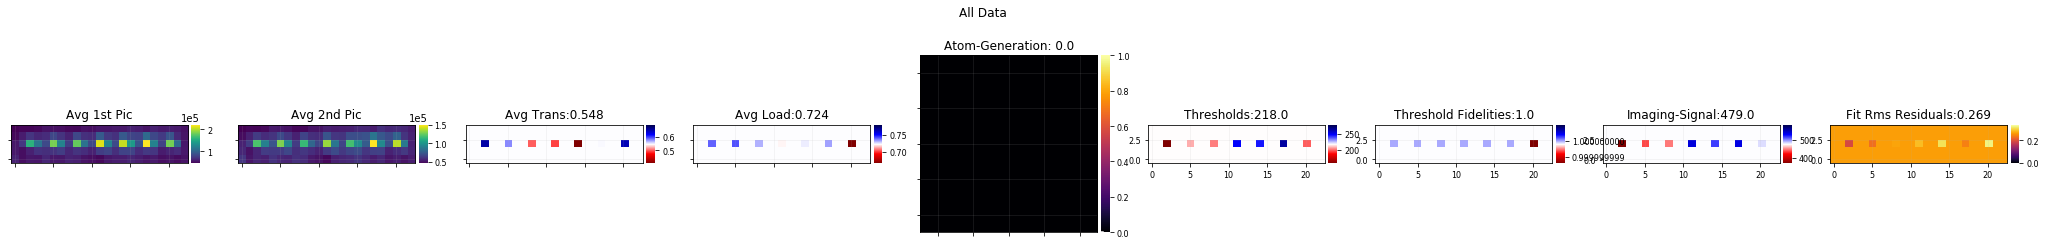

In [14]:
res = mp.Survival(8,atomlocs,fitModules=dip,usePickle=False,pickleResult = False,showFitDetails=True);
print(res["Fit_Character"])
prev_biases = [0.1413597441794259, 0.16005112718221046, 0.11248665116011748, 0.14609463069335227, 
               0.08484144222816031, 0.17926423150823267, 0.1759021730485008]
depths = np.array([res["Fit_Character"]])+3
ah.getBetterBiases(depths,[8],prev_biases,sign=-1)